## Kofi's First Idea

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_useful)
x_scaled = scaler.transform(X_useful)
x_useful = pd.DataFrame(x_scaled, columns = X_useful.columns)

In [ ]:
x_full_useful = pd.concat([x_useful, categorical_useful], axis=1)

In [ ]:
x_full_useful

,q1_balance,q2_balance,q3_balance,q4_balance,overdraft_protection_Yes,own_your_home_Yes
0,1.224165,-0.267767,0.095768,0.343376,0,0
1,-1.406368,-1.954545,-1.743065,-0.795158,0,1
2,-0.877034,-1.416351,-1.621922,-1.017137,0,1
3,1.077307,1.664042,0.139163,-0.700280,0,0
4,1.984276,0.782367,-0.108546,-0.796948,0,1
...,...,...,...,...,...,...
17995,-1.249827,-2.044244,-1.755722,-0.737874,0,1
17996,0.118696,-0.129937,-0.179062,-0.492623,0,1
17997,0.012183,-0.508423,0.231375,1.224129,0,0
17998,-0.459053,-0.035862,-0.320094,1.440737,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_full_useful, y, test_size=0.3, random_state=100)

In [ ]:
X_train_tk_useful, y_train_tk_useful = tomek.fit_resample(X_train, y_train)

In [ ]:
X_train_tk_sm_useful, y_train_tk_sm_useful = smote.fit_resample(X_train_tk_useful, y_train_tk_useful)

In [ ]:
y_train_tk_sm_useful.value_counts()

Yes    11448
No     11448
Name: offer_accepted, dtype: int64

In [ ]:
lr = LogisticRegression(max_iter=400).fit(X_train_tk_sm_useful, y_train_tk_sm_useful)
y_pred_tk_sm_useful = lr.predict(X_test)

In [ ]:
accuracy_score(y_test ,y_pred_tk_sm_useful)

0.5111111111111111

In [ ]:
pd.DataFrame(classification_report(y_test, y_pred_tk_sm_useful, output_dict=True))

,No,Yes,accuracy,macro avg,weighted avg
precision,0.947559,0.053131,0.511111,0.500345,0.900353
recall,0.512219,0.491228,0.511111,0.501724,0.511111
f1-score,0.664975,0.095890,0.511111,0.380433,0.634940
support,5115.000000,285.000000,0.511111,5400.000000,5400.000000


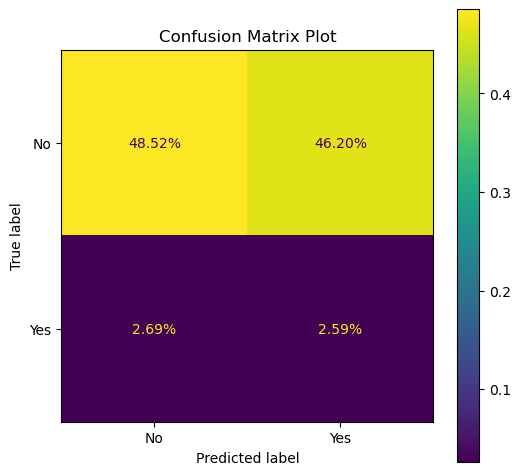

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
plt.title('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test, ax=ax, normalize='all', values_format='.2%');